# Bengaluru House Price Data

Research Question: To predict the prices of the Property in Bangalore 

In [1]:
#Importing the essential libraries 
import pandas as pd
import numpy as np

#Importing the graph plotting libraries  
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

import warnings
warnings.filterwarnings("ignore")

In [2]:
pwd

'C:\\Users\\Suhal'

In [3]:
#Loading the data into data frame

df = pd.read_csv('C:\\Users\\Suhal\\Desktop\\MS In DA\\Data Sets\\Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.shape

(13320, 9)

In [5]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [6]:
#Droping the features that are not required to build our model

df1 = df.drop(['area_type','society','balcony','availability'],axis='columns')
df1.shape

(13320, 5)

In [7]:
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


# Exploratory Data Analysis

Data Cleaning: Handle NA values

In [10]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [11]:
df1.shape

(13320, 5)

In [12]:
#Dropping the Null Values

df2 = df1.dropna() 
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [13]:
df2.shape

(13246, 5)

In [14]:
#Add new feature(integer) for bhk

df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [15]:
df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))
df2.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [16]:
df2[df2.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [17]:
#Exploring total_sqft feature

df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [18]:
#Converting total_sqft values to float

def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [19]:
df2[~df2['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


Above shows that total_sqft can be a range (e.g. 2100-2850). For such case we can just take average of min and max value in the range. There are other cases such as 34.46Sq. Meter which one can convert to square ft using unit conversion. 

In [24]:
#Taking the above total_sqft values and float

def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [25]:
df3 = df2.copy()
df3.total_sqft = df3.total_sqft.apply(convert_sqft_to_num)
df3 = df3[df3.total_sqft.notnull()]


In [26]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


Adding new feature called price per square feet

In [27]:
df4 = df3.copy()
df4['price_per_sqft'] = df3['price']*100000 / df3['total_sqft']
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [28]:
len(df4.location.unique())

1298

In [29]:
#Examine locations which is a categorical variable. 
#We need to apply dimensionality reduction technique here to reduce number of locations

df4.location = df4.location.apply(lambda x: x.strip())
location_stats = df4['location'].value_counts(ascending=False)
location_stats

Whitefield                                     533
Sarjapur  Road                                 392
Electronic City                                304
Kanakpura Road                                 264
Thanisandra                                    235
Yelahanka                                      210
Uttarahalli                                    186
Hebbal                                         176
Marathahalli                                   175
Raja Rajeshwari Nagar                          171
Bannerghatta Road                              151
Hennur Road                                    150
7th Phase JP Nagar                             148
Haralur Road                                   141
Electronic City Phase II                       131
Rajaji Nagar                                   106
Chandapura                                      98
Bellandur                                       96
Hoodi                                           88
KR Puram                       

In [30]:
location_stats.values.sum()

13200

In [31]:
len(location_stats[location_stats>10])

240

In [32]:
len(location_stats)

1287

In [33]:
len(location_stats[location_stats<=10])

1047

Dimensionality Reduction

Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [34]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

Thyagaraja Nagar                               10
Dairy Circle                                   10
Kalkere                                        10
Dodsworth Layout                               10
Sadashiva Nagar                                10
Nagappa Reddy Layout                           10
Basapura                                       10
Naganathapura                                  10
Ganga Nagar                                    10
Sector 1 HSR Layout                            10
BTM 1st Stage                                  10
Gunjur Palya                                   10
1st Block Koramangala                          10
Nagadevanahalli                                10
Mathikere                                       9
Richmond Town                                   9
Yemlur                                          9
Peenya                                          9
Chandra Layout                                  9
Kamakshipalya                                   9


In [35]:
len(df4.location.unique())

1287

In [36]:
df4.location = df4.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df4.location.unique())

241

In [37]:
df4.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


# Outlier Removal 

In [38]:
df4[df4.total_sqft/df4.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


Checking above data points. We have 6 bhk apartment with 1020 sqft. Another one is 8 bhk and total sqft is 600. These are clear data errors that can be removed safely.

In [39]:
df4.shape

(13200, 7)

In [40]:
df5 = df4[~(df4.total_sqft/df4.bhk<300)]
df5.shape

(12456, 7)

In [41]:
df5.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

Here we find that min price per sqft is 267 rs/sqft whereas max is 12000000, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation

In [42]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df6 = remove_pps_outliers(df5)
df6.shape

(10242, 7)

Checking the property rate of 2bhk and 3bhk using scatter plot for removing the outliers

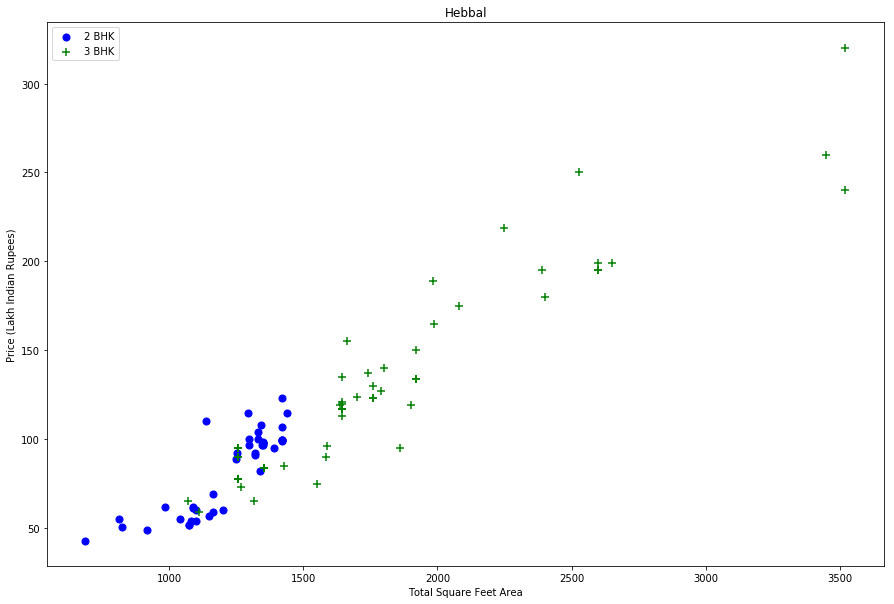

In [43]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df6,"Hebbal")

Now we can remove those 2-3 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1-2 BHK apartment

In [44]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df7 = remove_bhk_outliers(df6)
df7.shape

(7317, 7)

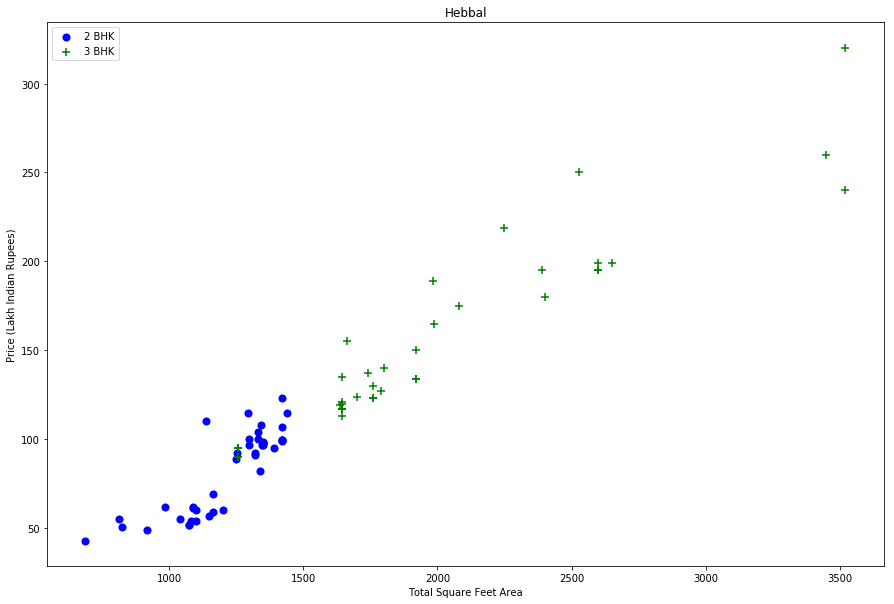

In [45]:
plot_scatter_chart(df7,"Hebbal")

In [46]:
#Outlier Removal for Bathrooms

df7.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [47]:
df7[df7.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8483,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8572,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9306,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9637,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


It is unusual to have 2 more bathrooms than number of bedrooms in a home

In [48]:
df7[df7.bath>df7.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8408,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [49]:
df8 = df7[df7.bath<df7.bhk+2]
df8.shape

(7239, 7)

In [50]:
df8.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [51]:
df9 = df8.drop(['size','price_per_sqft'],axis='columns')
df9.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


One Hot Encoding for Location

In [52]:
dummies = pd.get_dummies(df9.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
#Concading into dataframe

df10 = pd.concat([df9,dummies.drop('other',axis='columns')],axis='columns')
df10.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
df11 = df10.drop('location',axis='columns')
df11.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
df11.shape

(7239, 244)

# Correlation Matrix and Distribution Plot of Dependent Variable

In [56]:
corr = df11.corr()
corr

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
total_sqft,1.000000,0.693730,0.841063,0.670549,0.020145,0.002061,-0.007060,-0.002399,0.028050,-0.010191,...,-0.007099,0.006974,-0.017973,-0.014788,0.098281,-0.006244,0.000011,-0.035384,-0.008570,-0.017573
bath,0.693730,1.000000,0.601248,0.893911,0.019448,0.010620,-0.010211,0.033484,0.018004,-0.012585,...,-0.002288,0.027222,-0.010349,-0.028865,0.072345,-0.017170,0.001992,-0.045865,-0.010211,-0.021230
price,0.841063,0.601248,1.000000,0.571255,0.062831,0.016791,-0.018454,0.032754,0.005128,-0.020017,...,-0.003092,-0.006646,-0.016965,-0.021576,0.066230,-0.008227,-0.014966,-0.029232,-0.017884,-0.005901
bhk,0.670549,0.893911,0.571255,1.000000,0.027451,0.000841,0.005169,0.039226,0.026922,-0.012190,...,-0.004883,0.032758,-0.012515,-0.034906,0.049321,-0.005156,-0.006459,-0.046563,-0.013130,-0.029625
1st Block Jayanagar,0.020145,0.019448,0.062831,0.027451,1.000000,-0.001464,-0.001035,-0.000732,-0.000896,-0.001794,...,-0.001973,-0.000732,-0.000732,-0.002040,-0.005736,-0.001214,-0.003411,-0.001794,-0.001035,-0.002230
1st Phase JP Nagar,0.002061,0.010620,0.016791,0.000841,-0.001464,1.000000,-0.001565,-0.001107,-0.001356,-0.002714,...,-0.002985,-0.001107,-0.001107,-0.003087,-0.008678,-0.001836,-0.005161,-0.002714,-0.001565,-0.003373
2nd Phase Judicial Layout,-0.007060,-0.010211,-0.018454,0.005169,-0.001035,-0.001565,1.000000,-0.000782,-0.000958,-0.001918,...,-0.002109,-0.000782,-0.000782,-0.002181,-0.006133,-0.001298,-0.003647,-0.001918,-0.001106,-0.002384
2nd Stage Nagarbhavi,-0.002399,0.033484,0.032754,0.039226,-0.000732,-0.001107,-0.000782,1.000000,-0.000677,-0.001356,...,-0.001491,-0.000553,-0.000553,-0.001542,-0.004335,-0.000917,-0.002578,-0.001356,-0.000782,-0.001685
5th Block Hbr Layout,0.028050,0.018004,0.005128,0.026922,-0.000896,-0.001356,-0.000958,-0.000677,1.000000,-0.001661,...,-0.001827,-0.000677,-0.000677,-0.001889,-0.005310,-0.001124,-0.003158,-0.001661,-0.000958,-0.002064
5th Phase JP Nagar,-0.010191,-0.012585,-0.020017,-0.012190,-0.001794,-0.002714,-0.001918,-0.001356,-0.001661,1.000000,...,-0.003658,-0.001356,-0.001356,-0.003782,-0.010634,-0.002250,-0.006324,-0.003326,-0.001918,-0.004134


In [57]:
import seaborn as sns
from scipy.stats import norm
from scipy import stats

C:\Users\Suhal\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


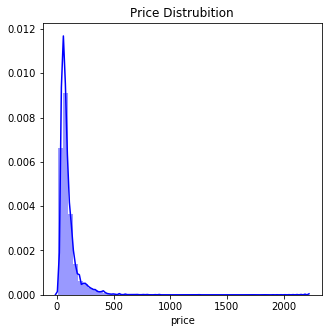

In [58]:
#histogram of Price

plt.figure(figsize=(5,5))
sns.distplot(df11['price'],color='b');
plt.title("Price Distrubition")
plt.show()

C:\Users\Suhal\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


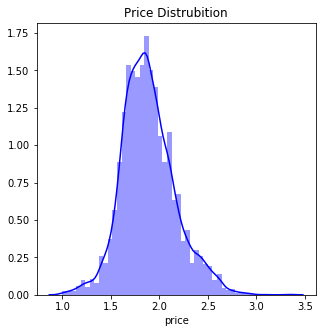

In [59]:
y=np.log10(df11.price)

plt.figure(figsize=(5,5))
sns.distplot(y,color='b');
plt.title("Price Distrubition")
plt.show()

# Building Model and Evalution Matrix

In [60]:
X = df11.drop(['price'],axis='columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
X.shape

(7239, 243)

In [62]:
y = df11.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [63]:
len(y)

7239

In [64]:
#Spliting data into test and train

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

Decision Tree Regressor Model and Evalution

In [65]:
from sklearn.tree import DecisionTreeRegressor

dtregressor = DecisionTreeRegressor()
dtregressor.fit(X_train,y_train)

Y_dtregressor_pred = dtregressor.predict(X_test)

Y_dtregressor_x_pred = dtregressor.predict(X_train)

In [66]:
r2 = r2_score(y_test,Y_dtregressor_pred)
print('R-Square Score: ',r2*100)

R-Square Score:  70.97803515002485


In [67]:
print("RMSE value of Training dataset:" + np.sqrt(metrics.mean_squared_error(y_train,Y_dtregressor_x_pred)).astype(str))
print("RMSE value of testing dataset:" + np.sqrt(metrics.mean_squared_error(y_test,Y_dtregressor_pred)).astype(str))

RMSE value of Training dataset:7.919305204333515
RMSE value of testing dataset:38.79874213113677


In [68]:
acc = dtregressor.score(X_train,y_train)
print('Accuracy: ',acc*100)

Accuracy:  99.24641586257006


In [69]:
from sklearn.model_selection import cross_val_score
cv_res = cross_val_score(dtregressor, X_train, y_train, cv=4, scoring="r2")
print(cv_res.mean())
cv_res

0.7002355528959797


array([0.75069898, 0.81293275, 0.66690821, 0.57040227])

Lasso Regressor Model and Evalution

In [70]:
from sklearn.linear_model import Lasso

la = Lasso()
la.fit(X_train,y_train)

Y_la_pred = la.predict(X_test)

Y_la_x_pred = la.predict(X_train)

In [71]:
r2 = r2_score(y_test,Y_la_pred)
print('R-Square Score: ',r2*100)

R-Square Score:  71.84797447099162


In [74]:
print("RMSE value of Training dataset:" + np.sqrt(metrics.mean_squared_error(y_train,Y_la_x_pred)).astype(str))
print("RMSE value of testing dataset:" + np.sqrt(metrics.mean_squared_error(y_test,Y_la_pred)).astype(str))

RMSE value of Training dataset:48.98991326238628
RMSE value of testing dataset:38.21281781662464


In [75]:
acc = la.score(X_train,y_train)
print('Accuracy: ',acc*100)

Accuracy:  71.16161550397618


In [76]:
from sklearn.model_selection import cross_val_score
cv_res = cross_val_score(la, X_train, y_train, cv=4, scoring="r2")
print(cv_res.mean())
cv_res

0.6891777523534478


array([0.65427963, 0.71740714, 0.69740193, 0.6876223 ])